In [1]:
import pandas as pd

Data = pd.read_csv('data/CBMMD-R_2023-09-27_09-37.txt',delimiter='\t')

Data.keys()

Index(['timestamp', 'date', 'time', 'Kappa', 'Eacc', 'std Eacc', 'Qo',
       'std Qo', 'Pinc_correct', 'std Pinc_correct', 'Pref_correct',
       'std Pref_correct', 'Pt_correct', 'std Pt_correct', 'B*', 'std B*',
       'QL', 'std QL', 'Q0*', 'std Q0*', 'Ploss', 'std Ploss', 'B1', 'std B1',
       'B2', 'std B2', 'Qext1', 'std Qext1', 'Qext2', 'std Qext2',
       'Frequency [Hz]', 'tau', 'RadTop [mR/hr]', 'RadBot [mR/hr]', 'Pi_meas',
       'Pr_meas', 'Pt_meas', 'ci', 'cr', 'ct', 'PHOMA_meas', 'PHOMB_meas',
       'cHOMA', 'cHOMB', 'PHOMA_correct', 'std PHOMA_correct', 'PHOMB_correct',
       'std PHOMB_correct', 'Qext_HOMA', 'std Qext_HOMA', 'Qext_HOMB',
       'std Qext_HOMB', 'PHOMC_meas', 'PHOMD_meas', 'cHOMC', 'cHOMD',
       'PHOMC_correct', 'std PHOMC_correct', 'PHOMD_correct',
       'std PHOMD_correct', 'Qext_HOMC', 'std Qext_HOMC', 'Qext_HOMD',
       'std Qext_HOMD', 'Dwr Temp from P', 'Pres 0-100T', 'Pres 0-1000T',
       'TcavTop [K]', 'TcavUpMid[K]', 'TcavLoMid[K]', 'Tc

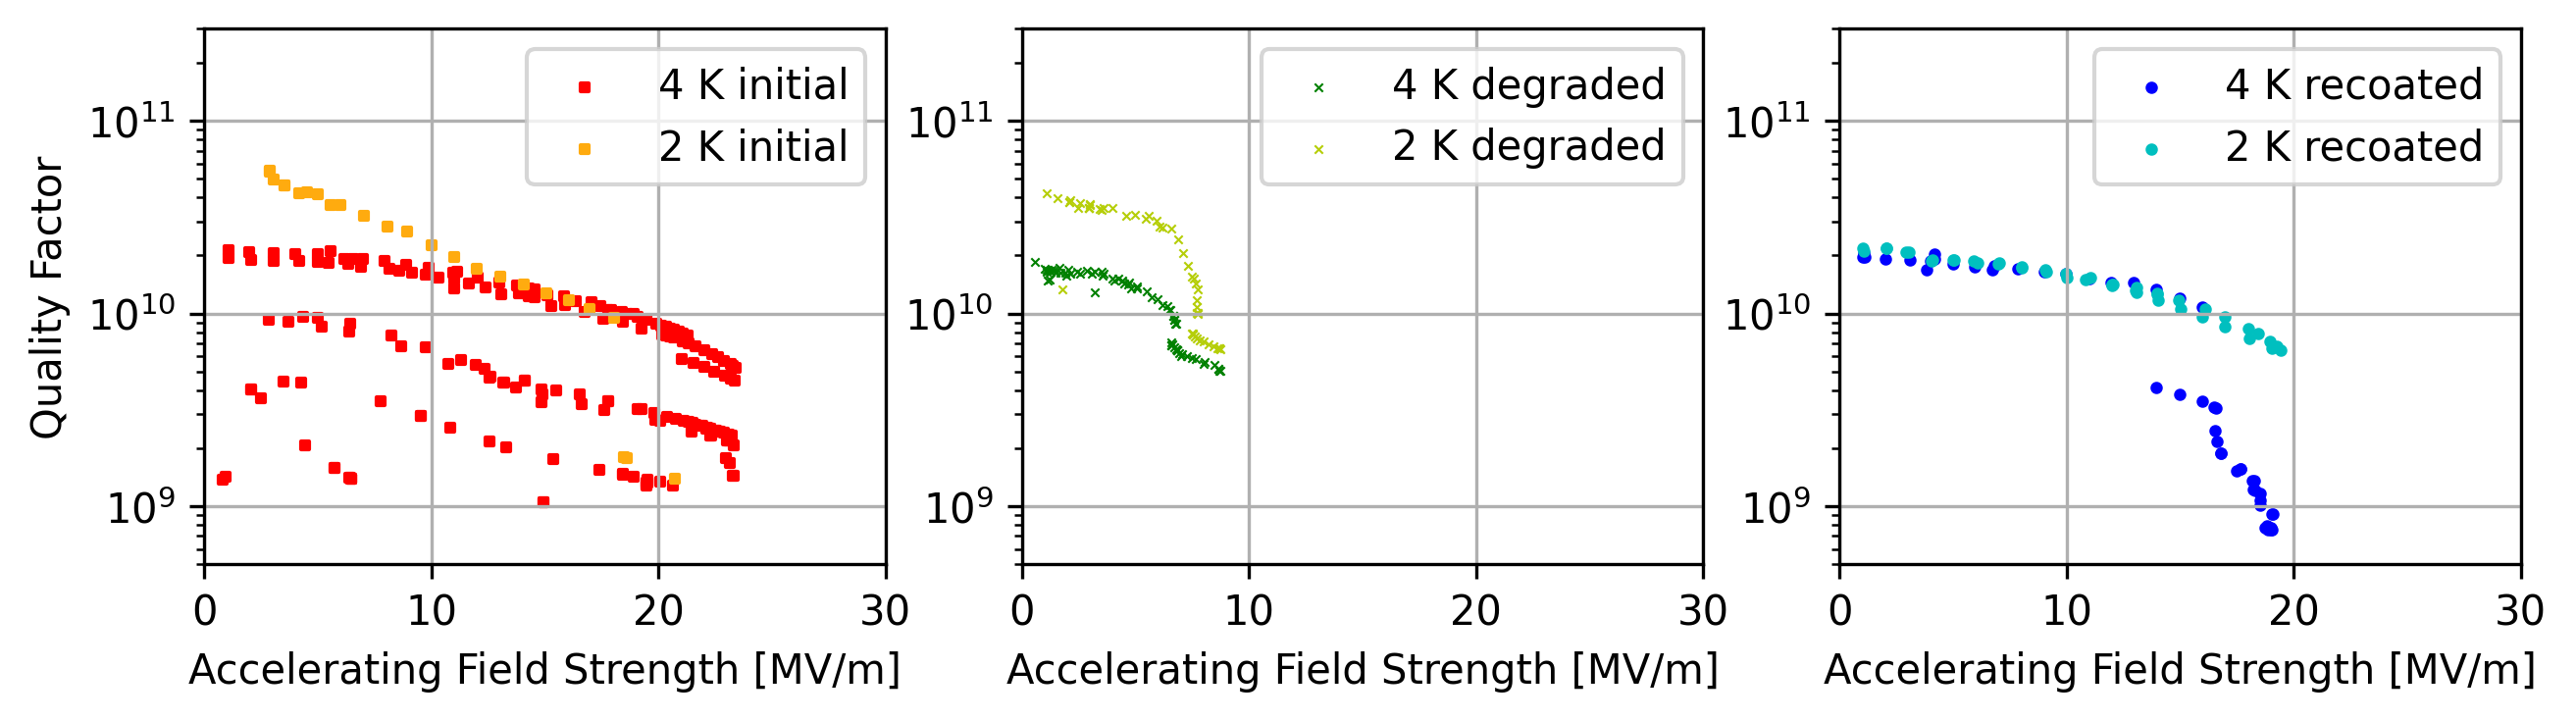

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

mpl.rcParams['lines.markersize'] = 2
mpl.rcParams["lines.linewidth"] = 0.5

mm = 0.0393701
fig, ax = plt.subplots(1,3,figsize=(3*86*mm,60*mm),dpi=300)


Data = pd.read_csv('data\CBMMD-R_2023-12-15_09-17.txt',delimiter='\t')

ax[2].scatter(Data['Eacc'][round(Data['TcavBot[K]'],0)==4],Data['Qo'][round(Data['TcavBot[K]'],0)==4],c='b',marker='o',label='4 K recoated')
ax[2].scatter(Data['Eacc'][round(Data['TcavBot[K]'],0)==2],Data['Qo'][round(Data['TcavBot[K]'],0)==2],c='c',marker='o',label='2 K recoated')


ax[2].legend(loc='upper right')

ax[2].set_xlabel('Accelerating Field Strength [MV/m]')
#ax[2].set_ylabel('Quality Factor')

ax[2].set_yscale('log')
ax[2].set_xlim(0,30)
ax[2].set_ylim(5e8,3e11)
ax[2].grid('both')


Data = pd.read_csv('data/CBMMD_2022-03-07_09-08.txt',delimiter='\t')

ax[1].scatter(Data['Eacc'][round(Data['TcavBot[K]'],0)==4],Data['Qo'][round(Data['TcavBot[K]'],0)==4],c='g',marker='x',label='4 K degraded')
ax[1].scatter(Data['Eacc'][round(Data['TcavBot[K]'],0)==2],Data['Qo'][round(Data['TcavBot[K]'],0)==2],c='xkcd:green/yellow',marker='x',label='2 K degraded')

ax[1].legend(loc='upper right')

ax[1].set_xlabel('Accelerating Field Strength [MV/m]')
#ax[1].set_ylabel('Quality Factor')

ax[1].set_yscale('log')
ax[1].set_xlim(0,30)
ax[1].set_ylim(5e8,3e11)
ax[1].grid('both')

Data = pd.read_csv('data/CBMM-D-Roughness_2019-08-28_13-07.txt',delimiter='\t')


ax[0].scatter(Data['Eacc'][round(Data['Dwr Temp from P'],0)==4],Data['Qo'][round(Data['Dwr Temp from P'],0)==4],c='r',marker='s',label='4 K initial')


Data = pd.read_csv('data/CBMM-D_2020-01-30_14-29.txt',delimiter='\t')

ax[0].scatter(Data['Eacc'][round(Data['TcavBot[K]'],0)==2],Data['Qo'][round(Data['TcavBot[K]'],0)==2],c='xkcd:yellowish orange',marker='s',label='2 K initial')

ax[0].legend(loc='upper right')

ax[0].set_xlabel('Accelerating Field Strength [MV/m]')
ax[0].set_ylabel('Quality Factor')

ax[0].set_yscale('log')
ax[0].set_xlim(0,30)
ax[0].set_ylim(5e8,3e11)
ax[0].grid('both')

fig.savefig('paper/figures/VTS.png')



Text(0, 0.5, 'Frequency [Hz]')

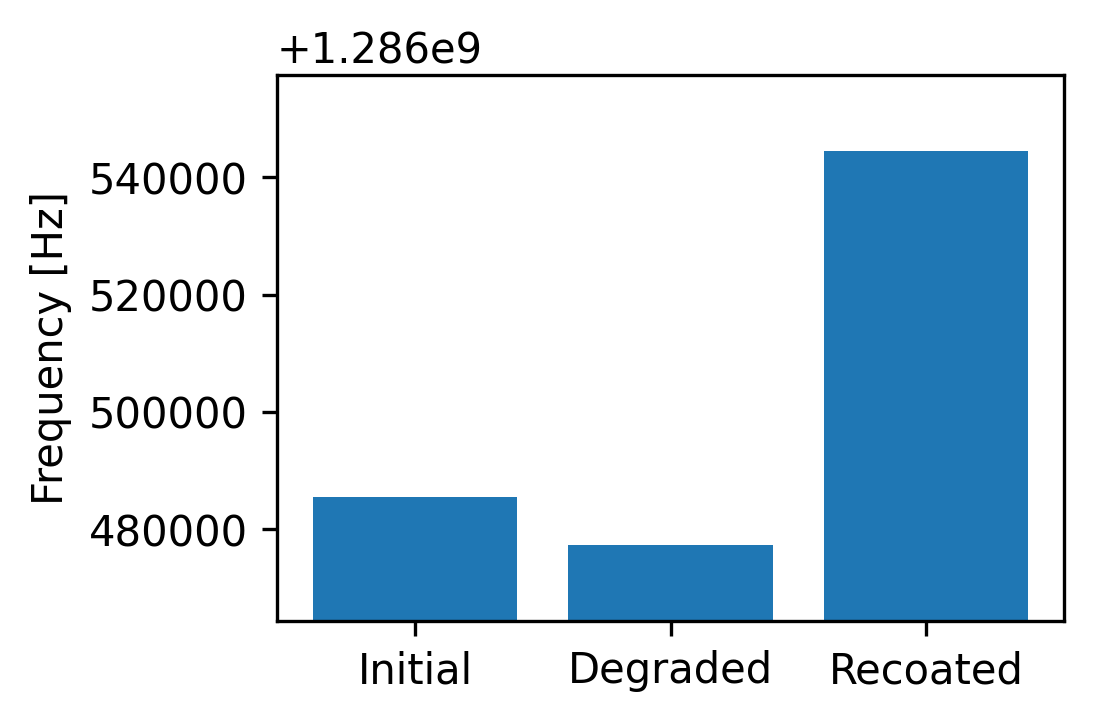

In [3]:


mpl.rcParams['lines.markersize'] = 2
mpl.rcParams["lines.linewidth"] = 0.5

mm = 0.0393701
fig, ax = plt.subplots(1,1,figsize=(86*mm,60*mm),dpi=300)

labels = ['Initial','Degraded','Recoated']

Data = [pd.read_csv('data/CBMM-D-Roughness_2019-01-24_16-12.txt',delimiter='\t'),
        pd.read_csv('data/CBMMD_2022-03-07_09-08.txt',delimiter='\t'),
        pd.read_csv('data/CBMMD-R_2023-09-27_09-37.txt',delimiter='\t')]

Frequency = [d['Frequency [Hz]'][round(d['TcavBot[K]'],0)==4].mean() for d in Data]

ax.bar(labels,Frequency)
ax.set_ylim(min(Frequency)*0.99999,max(Frequency)*1.00001)
ax.set_ylabel('Frequency [Hz]')



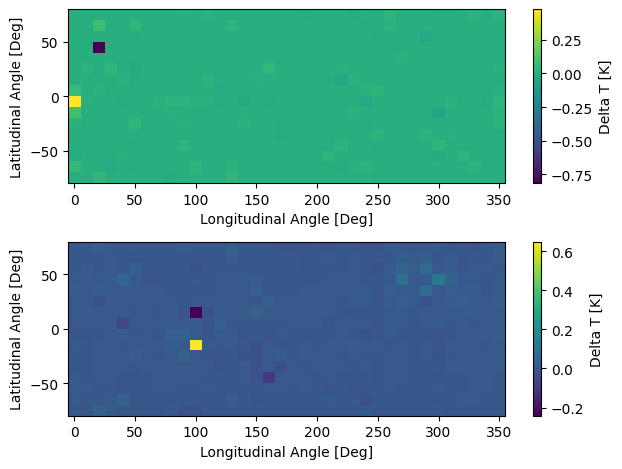

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import os

fig, axs = plt.subplots(2)

x, y = np.linspace(0,350,num=36), np.linspace(-75,75,num=16) 

X, Y = np.meshgrid(x,y)


TMAP_Directory = 'data/CBMM-R_2023_05_09/'

files = os.listdir(TMAP_Directory)
files = [file for file in files if '_RES' not in file and 'Calibration' not in file]

E_acc = np.array([np.loadtxt(TMAP_Directory+file,skiprows=3,max_rows=1,usecols=(2)) for file in files])

TMAP = np.array([np.loadtxt(TMAP_Directory+file,skiprows=4) for file in files])



map1 = axs[0].pcolormesh(X,Y,np.mean(TMAP[40:],axis = 0).T)
c = fig.colorbar(map1, ax=axs[0])

axs[0].set_xlabel('Longitudinal Angle [Deg]')
axs[0].set_ylabel('Latitudinal Angle [Deg]')
c.set_label('Delta T [K]')


TMAP_Directory = 'data\CBMMD-R_2023_12_18/'

files = os.listdir(TMAP_Directory)
files = [file for file in files if '_RES' not in file and 'Calibration' not in file]

E_acc = np.array([np.loadtxt(TMAP_Directory+file,skiprows=3,max_rows=1,usecols=(2)) for file in files])

TMAP = np.array([np.loadtxt(TMAP_Directory+file,skiprows=4) for file in files])



map2 = axs[1].pcolormesh(X,Y,np.mean(TMAP,axis = 0).T)
c = fig.colorbar(map2, ax=axs[1])

axs[1].set_xlabel('Longitudinal Angle [Deg]')
axs[1].set_ylabel('Latitudinal Angle [Deg]')
c.set_label('Delta T [K]')


fig.tight_layout()

fig.savefig('paper/figures/TMAP.png')

In [ ]:
x

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
       220., 230., 240., 250., 260., 270., 280., 290., 300., 310., 320.,
       330., 340., 350.])